#**Problem 5: Auto-MPG Dataset — Standardization and Correlation**  

Use **Dataset B (Auto-MPG)**. Define TRI (7×ntrain), TRO (ntrain×1), TEI (7×ntest), TEO (ntest×1)
using the Dataset B split rules. Tasks
1. Compute Standardize each feature row of TRI using training means/stds (population std), and apply
to TEI. Do not standardize TRO/TEO for MSE reporting.
2. Compute Compute the 8 × 8 absolute Pearson correlation matrix among {x1, . . . , x7, y = mpg}.
Present C. Which input correlates most with y?
3. Plot Fig. 9: TRO vs TRI[0,:] (cylinders). Fig. 10: TRO vs TRI[3,:] (weight). Use labels/titles.
Create one additional figure showing all 7 features vs mpg in a 3×3 grid (jitter discrete features:
cylinders, model year, origin).

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
datasetB = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

columnNames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

dataframeB = pd.read_csv(datasetB, names = columnNames, na_values = '?', sep = r'\s+', skipinitialspace = True) #whitespace delimiting

dataframeB['horsepower'] = pd.to_numeric(dataframeB['horsepower']) #making horsepower into numeric

dataframeB.dropna(inplace = True) #removing non numeric values

dataframeB.drop('car_name', axis = 1, inplace = True) #removing car names

In [ ]:
numpyB = dataframeB.to_numpy()

globalPermutation = np.random.permutation(numpyB.shape[0])
permData = numpyB[globalPermutation]

train = permData[:300] #300 indices
test = permData[300:392] #next 92

TRO = train[:, 0].reshape(-1, 1) #training mpg
TRI = train[:, 1:].T

TEO = test[:, 0].reshape(-1, 1) #testing mpg
TEI = test[:, 1:].T

In [ ]:
trainMeans = np.mean(TRI, axis = 1, keepdims = True)
trainStd = np.std(TRI, axis = 1, ddof = 0, keepdims = True)

standardizedTRI = (TRI - trainMeans) / trainStd
standardizedTEI = (TEI - trainMeans) / trainStd

print(standardizedTEI, standardizedTRI)

[[-0.85121809  0.31217793  1.47557396 -0.85121809  1.47557396 -0.85121809
   1.47557396  0.31217793 -0.85121809 -0.85121809 -0.85121809  1.47557396
   0.31217793 -0.85121809 -0.85121809 -0.85121809 -0.85121809  0.31217793
  -0.85121809  0.31217793 -0.85121809  1.47557396 -0.85121809  1.47557396
   0.31217793  1.47557396  0.31217793  1.47557396 -0.85121809 -0.85121809
  -0.85121809 -0.85121809  1.47557396  1.47557396  0.31217793 -0.85121809
  -0.85121809  0.31217793  1.47557396  0.31217793 -0.85121809 -0.85121809
  -0.85121809 -0.85121809 -0.85121809  0.31217793 -0.85121809  0.31217793
  -0.85121809  1.47557396  0.31217793  1.47557396 -0.85121809 -0.85121809
   1.47557396  1.47557396 -0.85121809 -0.85121809  1.47557396  0.31217793
  -0.85121809  1.47557396 -0.85121809 -0.85121809 -0.85121809  0.31217793
  -0.26952008  0.31217793 -0.26952008 -0.85121809  0.31217793 -0.85121809
   0.31217793 -0.85121809 -0.85121809 -0.85121809  1.47557396  1.47557396
   1.47557396  0.31217793  0.31217793 

In [ ]:
x = np.vstack([standardizedTRI, TRO.T])

C = np.corrcoef(x)

absoluteCorrelationMatrix = np.abs(C) #absolute value

print(absoluteCorrelationMatrix)

[[1.         0.94916707 0.83780626 0.89418442 0.48425765 0.31353548
  0.57031329 0.77226412]
 [0.94916707 1.         0.9002584  0.93324558 0.52842184 0.34516852
  0.60698169 0.80192547]
 [0.83780626 0.9002584  1.         0.86002861 0.69574238 0.40571116
  0.4470298  0.78364253]
 [0.89418442 0.93324558 0.86002861 1.         0.40868383 0.28401407
  0.58118978 0.83529286]
 [0.48425765 0.52842184 0.69574238 0.40868383 1.         0.28795718
  0.18679423 0.42265959]
 [0.31353548 0.34516852 0.40571116 0.28401407 0.28795718 1.
  0.15587893 0.57544469]
 [0.57031329 0.60698169 0.4470298  0.58118978 0.18679423 0.15587893
  1.         0.54514708]
 [0.77226412 0.80192547 0.78364253 0.83529286 0.42265959 0.57544469
  0.54514708 1.        ]]


In [ ]:
yCorrelation = absoluteCorrelationMatrix[7, :7] #finding feature that correlates the most with mpg

mostCorrelatedFeature = np.argmax(yCorrelation)
mostCorrelatedValue = yCorrelation[mostCorrelatedFeature]

print(f"input = {mostCorrelatedFeature}, correlates most with y = {mostCorrelatedValue:.4f}")

input = 3, correlates most with y = 0.8353


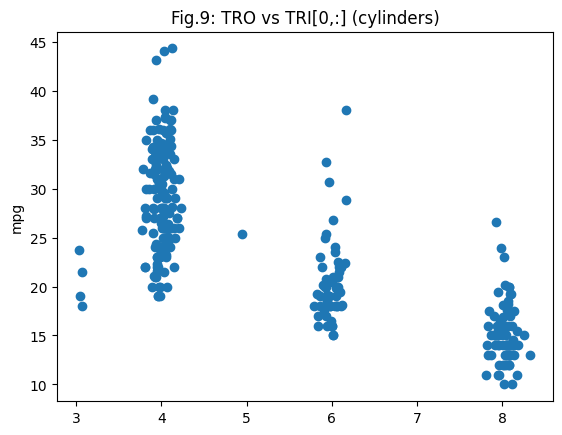

In [ ]:
cylinders = TRI[0, :]
mpg = TRO.flatten()

cylindersJitter = cylinders + np.random.normal(0, 0.1, len(cylinders))

plt.scatter(x = cylindersJitter, y = mpg)
plt.ylabel("mpg")
plt.title("Fig.9: TRO vs TRI[0,:] (cylinders)")
plt.show()

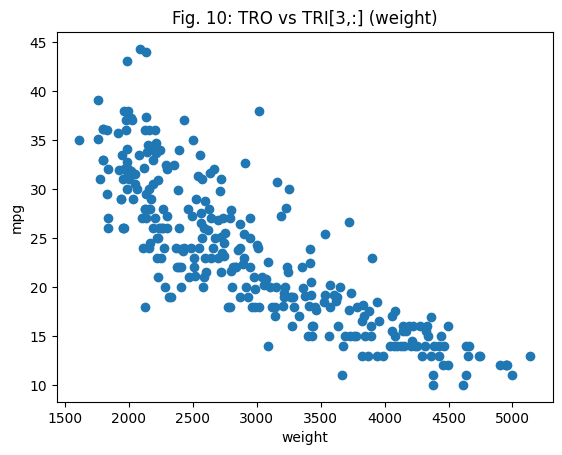

In [ ]:
weight = TRI[3, :]

plt.scatter(x = weight, y = mpg)
plt.title('Fig. 10: TRO vs TRI[3,:] (weight)')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

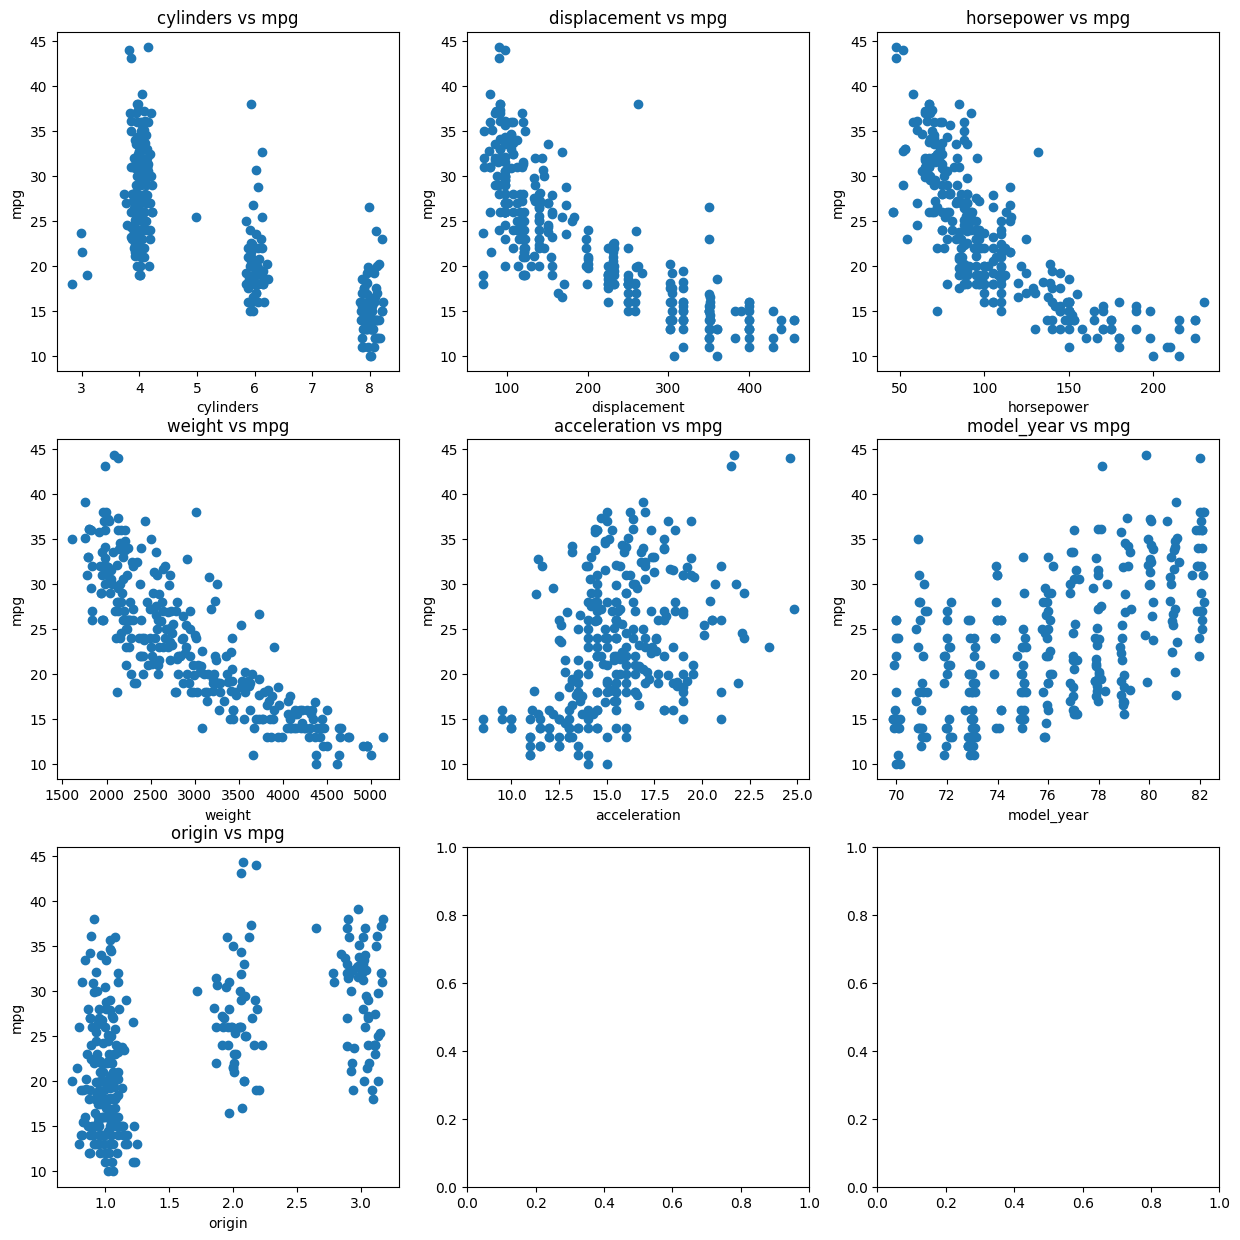

In [ ]:
featureNames = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

discreteFeatures = {0, 5, 6} #need jitter; these are cylinders, model_year, and origin

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15)) #3x3 grid
axes = axes.flatten()

for i in range(7):
    ax = axes[i]
    feature = TRI[i, :]

    if i in discreteFeatures:
      featureJitter = feature + np.random.normal(0, 0.1, len(feature))
    else:
      featureJitter = feature

    ax.scatter(x = featureJitter, y = mpg)
    ax.set_title(f'{featureNames[i]} vs mpg')
    ax.set_xlabel(featureNames[i])
    ax.set_ylabel('mpg')

plt.show()

#**Problem 6: Auto-MPG Dataset — Polynomial Regression with One Feature**  

For each of the 7 features separately, fit univariate polynomial regression with degrees M ∈ {0, 1, 2, 3, 4, 5}
using the same SVD LS framework and standardization policy (feature standardization via training stats;
row-standardize non-bias polynomial rows using training stats; report MSE in original mpg units). Tasks
1. Plot Fig. 11 (weight, M = 3): predicted curve over a dense standardized input grid (raw domain
[1613, 5140]) with TRO vs TRI[3,:] scatter. Labels, legend, title.
2. Plot Fig. 12 (horsepower, M = 3): predicted curve over dense grid (raw domain [46, 230]) with TRO
vs TRI[2,:] scatter.
3. Plot Fig. 13: test MSE vs M for all 7 features (different colors).
4. Discuss: Which input is most predictive? Relate to Problem 5 correlations.

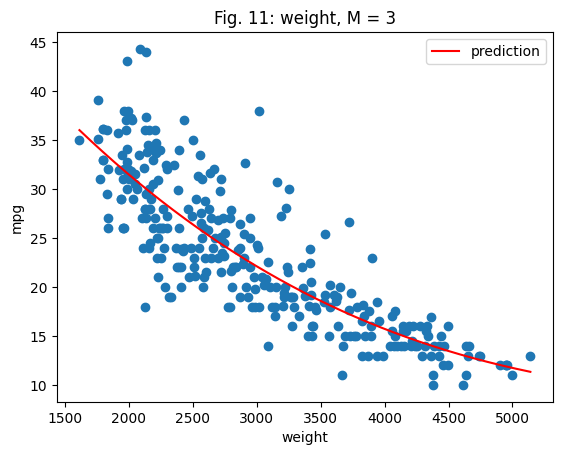

In [ ]:
weightRaw = TRI[3, :]
mpg = TRO.flatten()

weightMean = trainMeans[3, 0]
weightStd = trainStd[3, 0]

weightStandardized = (weightRaw - weightMean) / weightStd

X = np.vstack([np.ones_like(weightStandardized),
               weightStandardized,
               weightStandardized**2,
               weightStandardized**3])

U, eps, V = np.linalg.svd(X.T, full_matrices = False) #false makes it RSVD; X has to be transposed

epsInverse = np.diag(1 / eps)

aOpt = V.T @ epsInverse @ U.T @ mpg

gridRaw = np.linspace(1613, 5140, 500) #raw domain

gridStandardized = (gridRaw - weightMean) / weightStd

polyGrid = np.vstack([np.ones_like(gridStandardized),
                      gridStandardized,
                      gridStandardized**2,
                      gridStandardized**3])

mpgPrediction = (aOpt.T @ polyGrid)

plt.plot(gridRaw, mpgPrediction, color = 'red', label = 'prediction') #prediction plot
plt.scatter(x = weight, y = mpg)
plt.title('Fig. 11: weight, M = 3')
plt.legend()
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

**Plot Fig. 12**  
(horsepower, M = 3): predicted curve over dense grid (raw domain [46, 230]) with TRO
vs TRI[2,:] scatter.

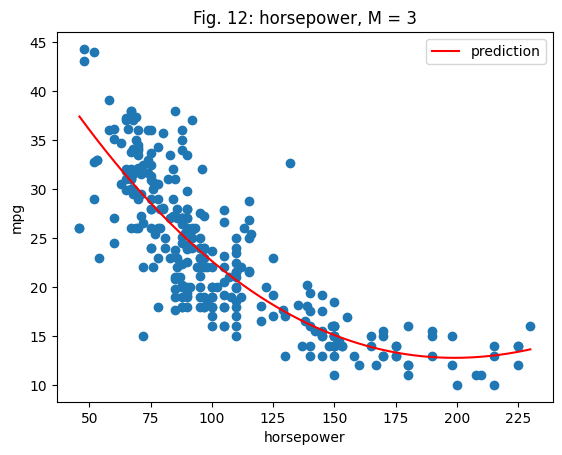

In [30]:
horsepowerRaw = TRI[2, :]
mpg = TRO.flatten()

horsepowerMean = trainMeans[2, 0]
horsepowerStd = trainStd[2, 0]

horsepowerStandardized = (horsepowerRaw - horsepowerMean) / horsepowerStd

X = np.vstack([np.ones_like(horsepowerStandardized),
               horsepowerStandardized,
               horsepowerStandardized**2,
               horsepowerStandardized**3])

U, eps, V = np.linalg.svd(X.T, full_matrices = False) #false makes it RSVD; X has to be transposed

epsInverse = np.diag(1 / eps)

aOpt = V.T @ epsInverse @ U.T @ mpg

gridRaw = np.linspace(46, 230, 500) #raw domain

gridStandardized = (gridRaw - horsepowerMean) / horsepowerStd

polyGrid = np.vstack([np.ones_like(gridStandardized),
                      gridStandardized,
                      gridStandardized**2,
                      gridStandardized**3])

plt.plot(gridRaw, mpgPrediction, color = 'red', label = 'prediction') #prediction plot
plt.scatter(x = horsepowerRaw, y = mpg)
plt.title('Fig. 12: horsepower, M = 3')
plt.legend()
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

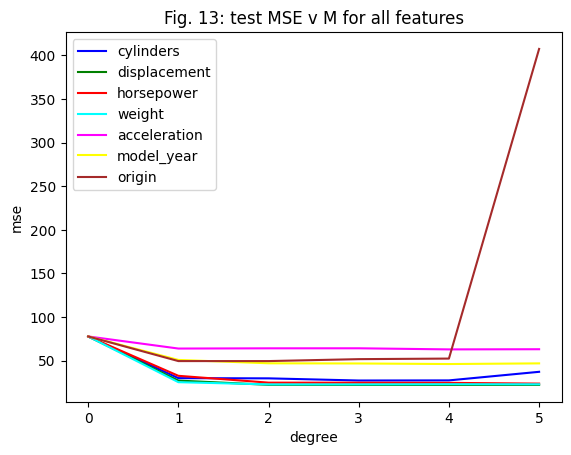

In [37]:
degrees = [0,1,2,3,4,5]

allMSE = [] #storing MSE curves

for featureIndex in range(7):
  xTrainRaw = TRI[featureIndex, :]
  yTrain = TRO.flatten()

  xTestRaw = TEI[featureIndex, :]
  yTest = TEO.flatten()

  mu = trainMeans[featureIndex, 0]
  standardDeviation = trainStd[featureIndex, 0]

  xTrainStd = (xTrainRaw - mu) / standardDeviation
  xTestStd = (xTestRaw - mu) / standardDeviation

  listMSE =[]

  for M in degrees: #making matrix
    X = np.vstack([xTrainStd**m for m in range(M + 1)]).T

    U, eps, V = np.linalg.svd(X, full_matrices = False)

    epsInverse = np.diag(1 / eps)

    aOpt = V.T @ epsInverse @ U.T @ yTrain

    xTest = np.vstack([xTestStd**m for m in range(M + 1)]).T

    yPrediction = xTest @ aOpt

    mse = np.mean((yPrediction - yTest)**2) #testing MSE
    listMSE.append(mse)

  allMSE.append(listMSE) #keeps curve

  colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown'] #colors for various degrees

for i in range(7):
  plt.plot(degrees, allMSE[i], color = colors[i], label = featureNames[i])


plt.title('Fig. 13: test MSE v M for all features')
plt.legend()
plt.xlabel('degree')
plt.ylabel('mse')
plt.show()

#**Problem 7: Auto-MPG Dataset — Polynomial Regression with Seven Features (20 points)**  

Extend to multivariate polynomial regression with total degree M ∈ {1, 2, 3} using standardized features
(x1 = cylinders, x2 = displacement, x3 = horsepower, x4 = weight, x5 = acceleration, x6 = model year,
x7 = origin) and SVD LS. Include all monomials of total degree ≤ M. Apply row-standardization to
non-bias rows using training stats; report MSE in original mpg units. Tasks
1. **Present** For each M ∈ {1, 2, 3}, write the explicit model terms (e.g., for M = 2: 1, x1, . . . , x2
1
, x1x2, . . .).
2. **Compute** Train on TRI/TRO and evaluate on both train and test for each M. Report train and
test MSE.
3. **Plot Fig. 14**: MSE (y) vs M (x), training (red) and testing (blue). Compare the best multivari

In [62]:
def polyFeatures(X, M):
  N = X.shape[1]
  features = X.shape[0]

  bias = [np.ones(N)]

  for exponents in product(range(M + 1), repeat = features):
    if sum(exponents) == 0:
      continue
    if sum(exponents) <= M:
      term = np.ones(N)

      for featureIndex, power in enumerate(exponents):
        if power > 0:
          term *= X[featureIndex] ** power

        bias.append(term)

  return np.vstack(bias).T #NxP

degrees = [1,2,3]
trainMSE = []
testMSE = []

for M in degrees:
  Xtrain = polyFeatures(standardizedTRI, M) #training features

  U, eps, V = np.linalg.svd(Xtrain, full_matrices = False)

  epsInverse = np.diag(1 / eps)

  aOpt = V.T @ epsInverse @ U.T @ TRO.flatten()

  yTrainPrediction = Xtrain @ aOpt
  mseTrain = np.mean((yTrainPrediction - TRO.flatten())**2)
  trainMSE.append(mseTrain)

  xTest = polyFeatures(standardizedTEI, M)

  yTestPrediction = xTest @ aOpt

  mseTest = np.mean((yTestPrediction - TEO.flatten())**2)
  testMSE.append(mseTest)

for i, M in enumerate(degrees):
  print(f"{trainMSE[i]} {testMSE[i]}")


237.33427161458332 215.28560546875005
65.42632032381694 75.20909967090772
14.084284638157524 41.02594079637406


3. **Plot Fig. 14**: MSE (y) vs M (x), training (red) and testing (blue). Compare the best multivariate
test MSE with the best univariate (Problem 6). Discuss complexity, overfitting, generalization.


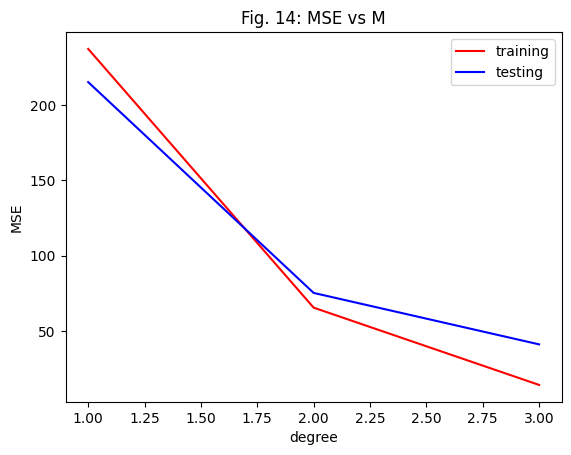

In [66]:
mValues = [1,2,3]

plt.plot(mValues, trainMSE, color = 'red', label = 'training')
plt.plot(mValues, testMSE, color = 'blue', label = 'testing')

plt.title('Fig. 14: MSE vs M')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()